<a href="https://colab.research.google.com/github/Eldinosaur/BI-GrupoD/blob/main/ClusterBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Planos/PlanoCluster.csv')

In [ ]:
data.head()

,envio,ciudad,anio,dia,mes,cliente,procedencia,vehiculo,conductor,estadoenvio
0,1,2,2015,5,1,1077,1,1,1816,3
1,2,2,2015,5,1,1077,1,1,1816,3
2,3,2,2015,5,1,1077,1,1,1816,3
3,4,30,2015,4,1,1170,1,2,150,2
4,5,30,2015,4,1,1170,1,2,150,3


In [ ]:
features = ["envio","ciudad","anio","dia","mes","cliente","vehiculo","conductor","estadoenvio"]

In [ ]:
data = data.dropna(subset=features)

In [ ]:
dataFrame =data[features].copy()

In [ ]:
dataFrame

,envio,ciudad,anio,dia,mes,cliente,vehiculo,conductor,estadoenvio
0,1,2,2015,5,1,1077,1,1816,3
1,2,2,2015,5,1,1077,1,1816,3
2,3,2,2015,5,1,1077,1,1816,3
3,4,30,2015,4,1,1170,2,150,2
4,5,30,2015,4,1,1170,2,150,3
...,...,...,...,...,...,...,...,...,...
12214,13288,10,2023,2,4,2495,2031,821,3
12215,13289,2,2023,3,4,1090,2133,1111,3
12216,13290,21,2023,3,4,997,2134,1595,3
12217,13291,21,2023,3,4,1712,2134,1595,3


In [ ]:
dataFrame = (dataFrame - dataFrame.min()) / (dataFrame.max() - dataFrame.min()) * 9 + 1

In [ ]:
dataFrame.describe()

,envio,ciudad,anio,dia,mes,cliente,vehiculo,conductor,estadoenvio
count,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000
mean,5.389700,1.355364,4.416155,5.522097,5.524474,5.603822,2.971674,5.918840,9.764301
std,2.607955,1.062940,2.509240,2.087337,2.785123,2.637555,2.555576,2.431353,1.399939
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.130652,1.000000,2.125000,4.000000,2.636364,3.717327,1.016878,4.703558,10.000000
50%,5.291099,1.000000,4.375000,5.500000,5.909091,5.201777,1.713080,6.057301,10.000000
75%,7.656723,1.000000,6.625000,7.000000,7.545455,8.152351,4.561181,7.710490,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
dataFrame.head()

,envio,ciudad,anio,dia,mes,cliente,vehiculo,conductor,estadoenvio
0,1.000000,1.246575,1.0,7.0,1.0,4.585339,1.000000,8.548521,10.0
1,1.000677,1.246575,1.0,7.0,1.0,4.585339,1.000000,8.548521,10.0
2,1.001354,1.246575,1.0,7.0,1.0,4.585339,1.000000,8.548521,10.0
3,1.002031,4.698630,1.0,5.5,1.0,4.895224,1.004219,1.619686,5.5
4,1.002709,4.698630,1.0,5.5,1.0,4.895224,1.004219,1.619686,10.0


In [ ]:
def random_centroids(dataFrame, k) :
    centroids = []
    for i in range(k):
        centroid=dataFrame.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(dataFrame,5)

In [ ]:
centroids

,0,1,2,3,4
envio,9.174554,8.711384,1.367692,9.963434,4.158905
ciudad,1.000000,1.000000,1.000000,1.000000,1.000000
anio,4.375000,1.000000,8.875000,3.250000,4.375000
dia,2.500000,2.500000,7.000000,7.000000,4.000000
mes,1.000000,1.000000,2.636364,10.000000,1.000000
cliente,3.755646,8.223991,7.114402,2.905961,3.325805
vehiculo,2.050633,5.607595,9.021097,1.004219,3.928270
conductor,7.575323,5.728743,9.821165,7.454713,1.507394
estadoenvio,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
def get_labels(dataFrame,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((dataFrame-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [ ]:
labels = get_labels(dataFrame,centroids)

In [ ]:
labels.value_counts()

3    4332
4    3508
0    2459
1    1451
2     469
dtype: int64

In [ ]:
def new_centroids(dataFrame, labels, k):
    # Calcula los nuevos centroides
    new_centroids = dataFrame.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return new_centroids  # Devuelve los nuevos centroides

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_clusters(dataFrame, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(dataFrame)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)  # Corrección del error tipográfico
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

In [ ]:
max_iterations = 100
k=3

In [ ]:
centroids = random_centroids(dataFrame, k)
old_centroids = pd.DataFrame()
iteration = 10

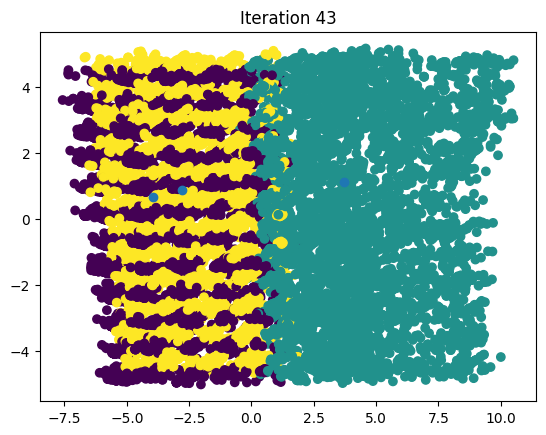

In [ ]:
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(dataFrame,centroids)
    centroids = new_centroids(dataFrame, labels, k)
    plot_clusters(dataFrame, labels, centroids, iteration)
    iteration += 1

In [ ]:
centroids

,0,1,2
envio,3.010807,7.929896,3.338015
ciudad,1.416951,1.012384,1.257887
anio,2.186069,6.778244,2.441583
dia,4.964556,5.139024,5.093447
mes,4.583017,4.535739,4.786958
cliente,8.491045,4.499741,3.355298
vehiculo,1.463115,3.656682,1.512265
conductor,5.968874,4.189229,6.104370
estadoenvio,9.354195,9.391295,9.585673


In [ ]:
labels.value_counts()

1    5023
2    3864
0    3332
dtype: int64

In [ ]:
# Guardar los cambios en el archivo Excel
dataFrame.to_csv('/content/drive/MyDrive/Planos/PlanoClusterizado.csv', index=False)